<a href="https://colab.research.google.com/github/rakesh4real/swift4tensorflow/blob/master/05_01_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load libraries

In [0]:
import Python // Visualisations
import TensorFlow

In [44]:
let plt = Python.import("matplotlib.pyplot")
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


# Prepare Dataset

In [0]:
// create

In [0]:
let num_of_data_points: Int = 10
var X = Tensor<Float>(rangeFrom: 0, to: 10, stride: 1)

let slope: Float = 2.0 
let intercept: Float = 3.0
let error = ( Tensor<Float>(randomNormal: [10]) ) * 0.8

let y: Tensor<Float> = slope * X + intercept + error

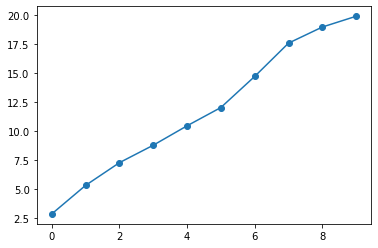

None


In [47]:
plt.close();
plt.plot(X.makeNumpyArray(), y.makeNumpyArray(), marker: "o")
plt.show();

# Split

In [0]:
// Shuffle
var shuffled_indices = Array<Int>(0..<X.scalarCount).shuffled()
var shuffled_X = Tensor<Float>(zeros: [X.scalarCount]) // will be replaced
var shuffled_y = Tensor<Float>(zeros: [X.scalarCount]) // will be replaced

for i in 0..<X.scalarCount{
  shuffled_X[i] = X[shuffled_indices[i]]
  shuffled_y[i] = X[shuffled_indices[i]]
}

// print(shuffled_X.description)

In [0]:
var split_percent: Float = 0.8
var train_count: Int = Int( Float(shuffled_X.scalarCount) * split_percent )

In [0]:
// generate test - train
let train_x = shuffled_X.slice(lowerBounds: [0], upperBounds: [train_count])
let test_x = shuffled_X.slice(lowerBounds: [train_count], upperBounds: [shuffled_X.scalarCount])
let train_y = shuffled_y.slice(lowerBounds: [0], upperBounds: [train_count])
let test_y = shuffled_y.slice(lowerBounds: [train_count], upperBounds: [shuffled_X.scalarCount])

/*
print(train_x.scalarCount)
print(train_y.scalarCount)
print(test_x.scalarCount)
print(test_y.scalarCount)
*/

// add bias to x_train for mx+'c'
// reshape both(ones & train_x) before concatenation
var ones_train = Tensor<Float>(ones: [train_count, 1])
var x_train_with_bias = train_x.reshaped(to: [train_count,1]).concatenated(with: ones_train, alongAxis: 1)

var ones_test = Tensor<Float>(ones: [(num_of_data_points - train_count), 1])
var x_test_with_bias = test_x.reshaped(to: [num_of_data_points - train_count, 1]).concatenated(with: ones_test, alongAxis: 1)

# Loss Function

In [0]:
@differentiable
func cost(predicted: Tensor<Float>, true_measure: Tensor<Float>) -> Tensor<Float>{
  let m: Float = Float( predicted.scalarCount )
  return (1 / (2 * m) ) * pow(predicted - true_measure, 2).sum()
}

In [0]:
var theta = Tensor<Float>(randomNormal: [2, 1])

In [89]:

for _ in 1...100{
  var pred2 = x_train_with_bias • theta
  var grad = gradient(at: pred2, train_y, in: cost)
  theta[0] = theta[0] - grad.0[0] * 0.0001
  theta[1] = theta[1] - grad.1[1] * 0.0001
  print(cost(predicted: pred2, true_measure: train_y))
}


179.56357
179.39737
179.23146
179.0658
178.90039
178.73523
178.57033
178.4057
178.2413
178.07718
177.9133
177.74966
177.58627
177.42319
177.2603
177.09769
176.93533
176.77321
176.61134
176.44974
176.28838
176.12726
175.9664
175.80579
175.64542
175.48529
175.32541
175.1658
175.00642
174.84729
174.68842
174.52975
174.37135
174.21323
174.0553
173.89763
173.7402
173.58304
173.42612
173.26941
173.11295
172.95674
172.80078
172.64505
172.48956
172.3343
172.17929
172.02454
171.87001
171.7157
171.56165
171.40784
171.25427
171.10092
170.94781
170.79492
170.6423
170.4899
170.33775
170.1858
170.03412
169.88264
169.73141
169.58041
169.42966
169.27914
169.12885
168.97879
168.82893
168.67935
168.52997
168.38083
168.2319
168.08324
167.93478
167.78656
167.63855
167.49078
167.34325
167.19594
167.04884
166.90198
166.75536
166.60895
166.46277
166.3168
166.17108
166.02557
165.88028
165.73523
165.59038
165.44577
165.30136
165.1572
165.01326
164.8695
164.72601
164.58273
164.43967
164.29681


In [0]:
  var pred = x_train_with_bias • theta
  var grad = gradient(at: pred, train_y, in: cost)
  print(type(of: grad))

(Tensor<Float>, Tensor<Float>)


In [0]:
var pre

In [0]:
for i in 1...100{
  var pred = x_train_with_bias • theta
  var grad = gradient(at: pred, train_y, in: cost)
  for i in 0..<8{
    theta[i][0] = theta[i][0] - 0.01 * grad.0
    theta[i][1] = theta[i][1] - 0.01 * grad.1
  }
}

Fatal error: sliced l-value shape [] does not match r-value shape [8,1]. Automatic broadcasting not yet implemented.: file /swift-base/tensorflow-swift-apis/Sources/TensorFlow/Bindings/EagerExecution.swift, line 300
Current stack trace:
0    libswiftCore.so                    0x00007ffb0f19e940 swift_reportError + 50
1    libswiftCore.so                    0x00007ffb0f20fcf0 _swift_stdlib_reportFatalErrorInFile + 115
2    libswiftCore.so                    0x00007ffb0f139b48 <unavailable> + 3722056
3    libswiftCore.so                    0x00007ffb0f139cd7 <unavailable> + 3722455
4    libswiftCore.so                    0x00007ffb0ef0c4e8 <unavailable> + 1438952
5    libswiftCore.so                    0x00007ffb0f10d5ce <unavailable> + 3540430
6    libswiftCore.so                    0x00007ffb0ef0bc09 <unavailable> + 1436681
7    libswiftTensorFlow.so              0x00007ffb0c399f50 <unavailable> + 2899792
8    libswiftTensorFlow.so              0x00007ffb0c1edd10 checkOk(_:file:line:) 

: ignored

In [0]:
theta

[[1.5704609],
 [ 1.916889]]


In [0]:
var grad = gradient(at: pred, train_y, in: cost)
grad

▿ 2 elements
  - .0 : [[  8.035115],
 [ 4.8941936],
 [ 11.176037],
 [  -1.38765],
 [  6.464655],
 [  1.753272],
 [ 9.6055765],
 [-2.9581108]]
  - .1 : [ -2.572886,  -4.572886,  -0.572886, -8.5728855,  -3.572886,  -6.572886,  -1.572886, -9.5728855]
